Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,
Metode pra pengolahan
Pemilihan fitur
Arsitektur ANN
Fungsi Aktiviasi
ANN diimplementasikan dengan menggunakan tensorflow.
DIKERJAKAN SECARA BERKELOMPOK
JELASKAN HASIL YANG ANDA DAPATKAN,
AKURASI
CONFUSION MATRIX
KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [2]:
# Load data MNIST dan split data menjadi data train dan data test
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print(len(X_train))
print(len(X_test))

11490434/11490434 [==============================] - 0s 0us/step
60000
10000


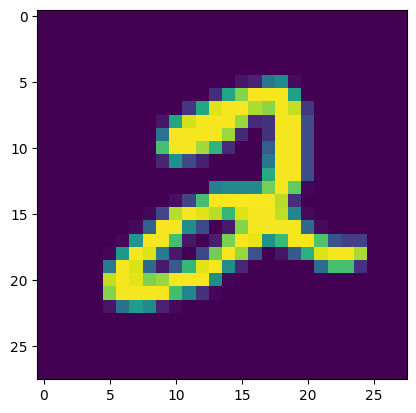

In [3]:
# menampilkan data gambar index ke 5
plt.imshow(X_train[5])
plt.show()

In [4]:
# Mengambil panjang vektor fitur
feature_vector_length = 784

# Mereshape data train dan test menjadi bentuk (jumlah sampel, panjang vektor fitur)
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Menyimpan panjang vektor fitur ke variabel `input_shape`
input_shape = (feature_vector_length,)

# Mencetak bentuk data train
X_train.shape



(60000, 784)

In [5]:
# Membuat model Sequential
model = Sequential()

# Menambahkan layer Dense pertama dengan 350 neuron dan aktivasi relu
model.add(Dense(350, input_shape=input_shape, activation='relu'))

# Menambahkan layer Dense kedua dengan 50 neuron dan aktivasi relu
model.add(Dense(50, activation='relu'))

# Menambahkan layer Dense ketiga dengan 10 neuron dan aktivasi softmax
model.add(Dense(10, activation='softmax'))

In [6]:
# melakukan compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Melakukan training model dengan 10 epochs
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 23s 10ms/step - loss: 1.4997 - accuracy: 0.6604
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5358 - accuracy: 0.8576
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2891 - accuracy: 0.9296
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2031 - accuracy: 0.9505
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1619 - accuracy: 0.9600
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1268 - accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1218 - accuracy: 0.9703
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1044 - accuracy: 0.9745
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0917 - accuracy: 0.9773
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - 

In [8]:
# evaluate model
test_results=model.evaluate(X_test,y_test)

# melakukan prediksi data test dengan model yang telah dilatih
y_predicted=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [9]:
from sklearn.metrics import accuracy_score

# Mendapatkan label prediksi
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Membuat confusion matrix menggunakan tensor TensorFlow
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# Mencetak confusion matrix
print(cm)

# Menghitung akurasi prediksi menggunakan fungsi accuracy_score()
accuracy = accuracy_score(y_test, y_predicted_labels)

# Mencetak akurasi prediksi
print(accuracy)

tf.Tensor(
[[ 972    0    0    0    0    1    1    1    5    0]
 [   0 1119    1    2    0    1    3    0    9    0]
 [   8    0 1001   10    1    1    0    3    8    0]
 [   1    0    2  995    0    3    0    3    4    2]
 [   1    0    6    0  943    0   10    1    2   19]
 [   2    0    0    9    1  872    5    1    1    1]
 [   9    2    3    0    0    4  936    0    4    0]
 [   2    3   12    0    0    0    0  999    5    7]
 [   5    0    3    8    2   10    1    1  942    2]
 [   1    2    0   11   13    4    0    6    7  965]], shape=(10, 10), dtype=int32)
0.9744
